This algorithm predicts the number of passengers of an airline in the future for organizational purposes. To accomplish this task, neural networks connected by dense layers were used.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [3]:
passengers = pd.read_csv('Passengers.csv')

In [4]:
passengers.head() #five first layers of data

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
mpl.rcParams['figure.figsize'] = (10,6) #changing plotting size
mpl.rcParams['font.size'] = 22

<Axes: xlabel='time', ylabel='passengers'>

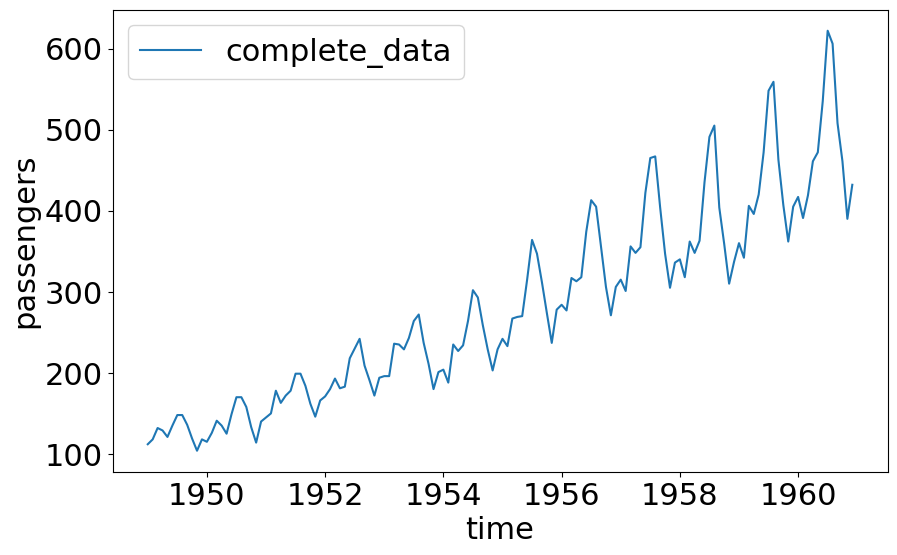

In [6]:
sns.lineplot(x='time',y='passengers', data=passengers, label='complete_data')

In [7]:
sc = StandardScaler() #staggering data

In [8]:
sc.fit(passengers) #fitting data

StandardScaler()

In [9]:
scaled_data = sc.transform(passengers) #transforming data

In [10]:
x = scaled_data[:,0]
y = scaled_data[:,1]

Text(0.5, 0, 'Date')

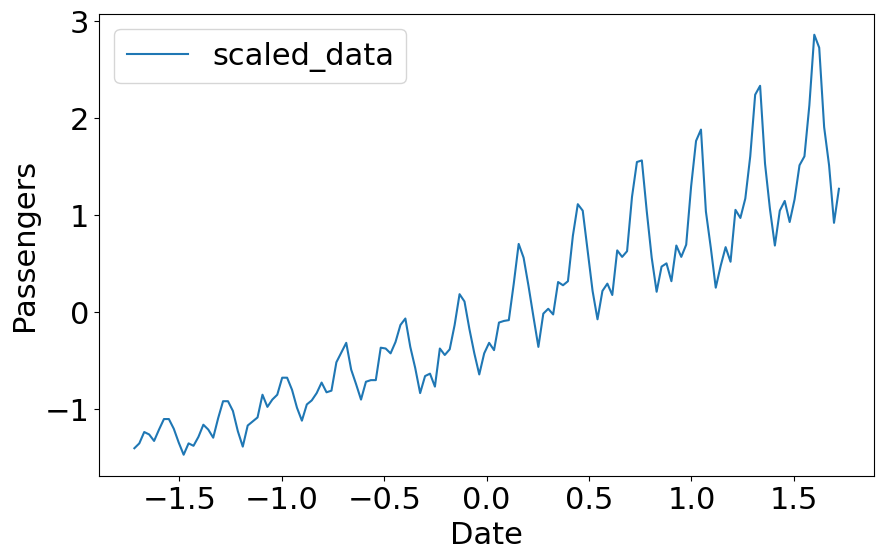

In [11]:
sns.lineplot(x=x, y=y, label='scaled_data')
plt.ylabel('Passengers')
plt.xlabel('Date')

In [12]:
training_size = int(len(passengers)*0.9) #picking up 90% of the data to train the network
testing_size= len(passengers) - training_size #picking up 10% of the data to test the network 

In [13]:
x_train = x[0:training_size]
y_train = y[0:training_size]

In [14]:
x_test = x[training_size:len(passengers)]
y_test = y[training_size:len(passengers)]

Text(0.5, 0, 'Date')

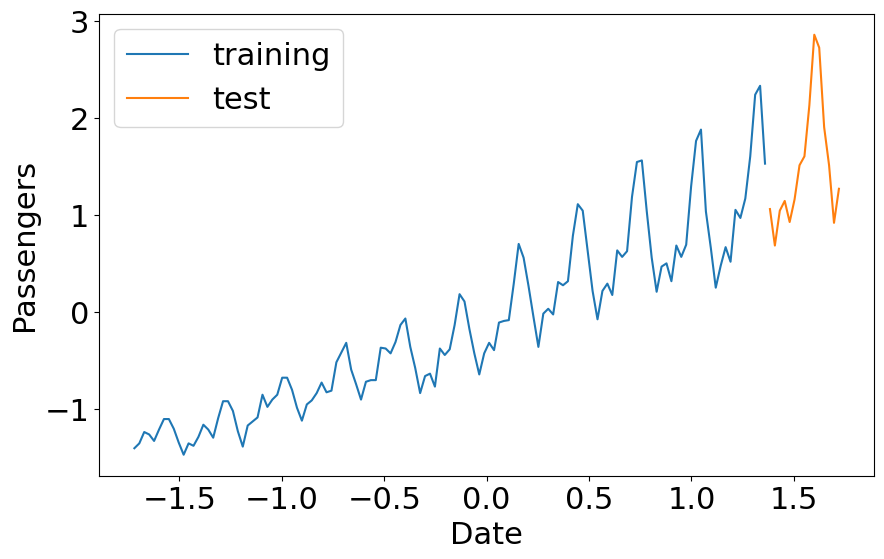

In [15]:
sns.lineplot(x=x_train, y=y_train, label='training')
sns.lineplot(x=x_test, y=y_test, label='test')
plt.ylabel('Passengers')
plt.xlabel('Date')

In [16]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False)) #adding dense layer to main network

In [17]:
regressor.compile(loss='mean_squared_error', optimizer='adam') #compiling the network
regressor.summary()
regressor.fit(x_train, y_train) # training the network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 1ms/step - loss: 0.1285


In [18]:
y_predict = regressor.predict(x_train) #using x_train dates to predict y_train

5/5 [==============================] - 0s 1ms/step


<Axes: >

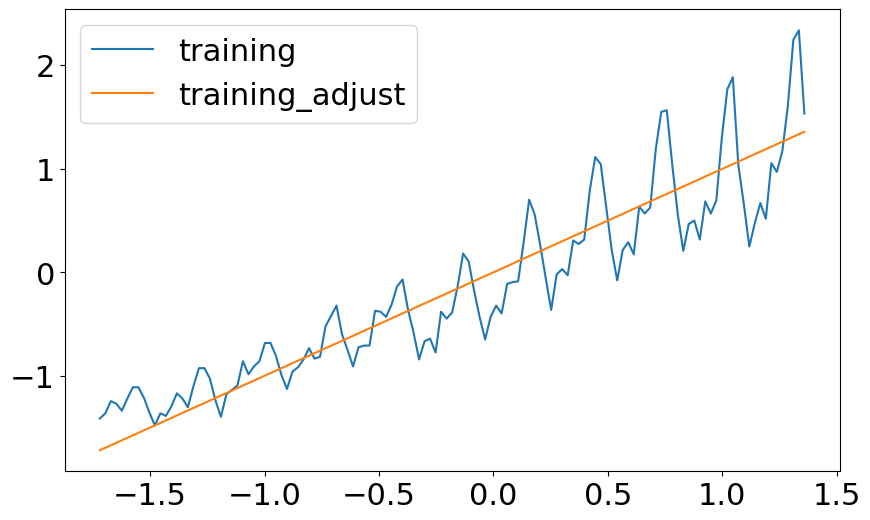

In [19]:
sns.lineplot(x=x_train, y=y_train, label='training')
sns.lineplot(x=x_train, y=y_predict[:,0], label='training_adjust')

In [20]:
d = {'Time': x_train, 'Passengers': y_predict[:,0]} 

In [21]:
results = pd.DataFrame(data=d) #saving the results of data (time, passengers) into a dataframe
results

,Time,Passengers
0,-1.720064,-1.713690
1,-1.696007,-1.689722
2,-1.671950,-1.665754
3,-1.647894,-1.641787
4,-1.623837,-1.617819
...,...,...
124,1.262984,1.258304
125,1.287041,1.282272
126,1.311098,1.306239
127,1.335155,1.330207


In [22]:
transf_result = sc.inverse_transform(results)
transf_result = pd.DataFrame(transf_result) #turning result into dataframe
transf_result.columns = ['time', 'passengers']

<Axes: xlabel='time', ylabel='passengers'>

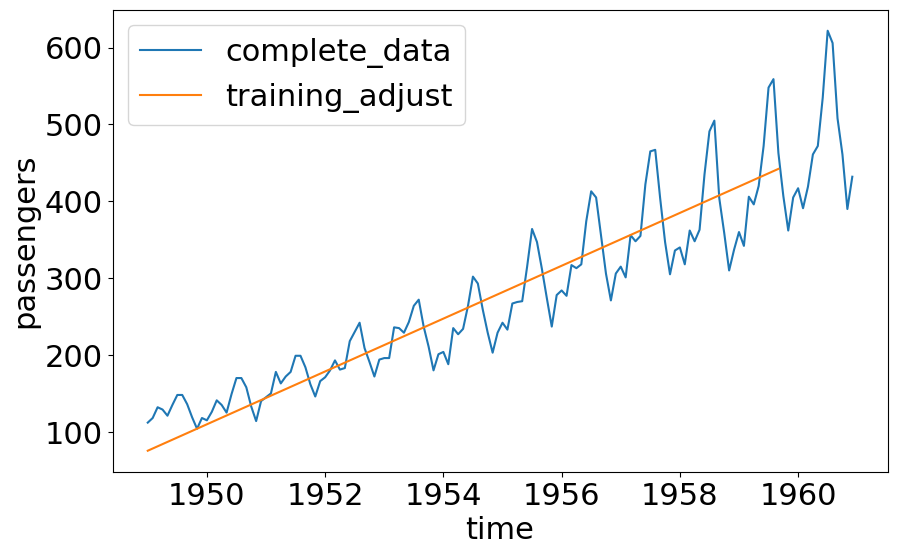

In [23]:
sns.lineplot(x='time', y='passengers', data=passengers, label='complete_data')
sns.lineplot(x='time', y='passengers', data=transf_result, label='training_adjust')

In [24]:
y_predict_test = regressor.predict(x_test)#predict based on testing data

1/1 [==============================] - 0s 25ms/step


In [25]:
d = {'time': x_test, 'passengers': y_predict_test[:,0]}
test_results = pd.DataFrame(data=d) #saving test results into a dataframe

In [26]:
transf_test_result = sc.inverse_transform(test_results)
transf_test_result = pd.DataFrame(transf_test_result)

In [27]:
transf_test_result.columns = ['time', 'passengers']

<Axes: xlabel='time', ylabel='passengers'>

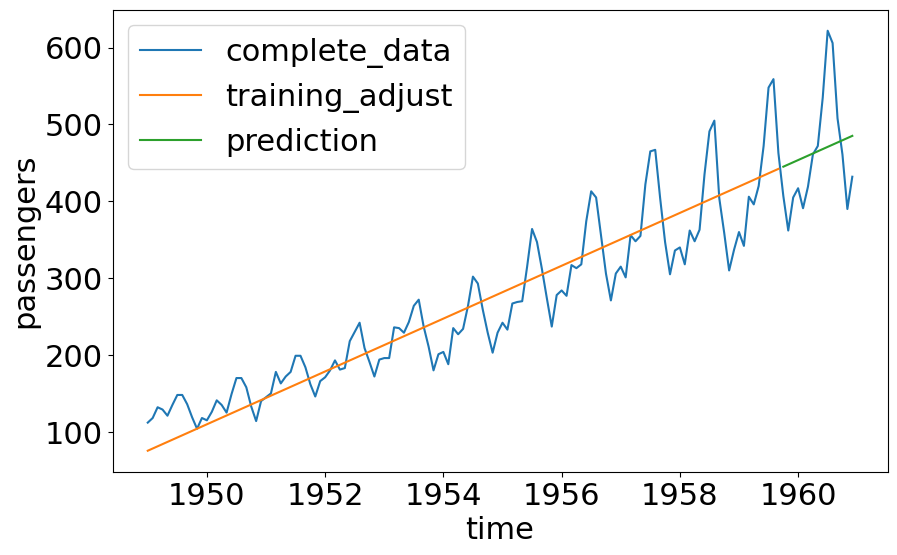

In [28]:
sns.lineplot(x='time', y='passengers', data=passengers, label='complete_data')
sns.lineplot(x='time', y='passengers', data=transf_result, label='training_adjust')
sns.lineplot(x='time', y='passengers', data=transf_test_result, label='prediction')

In [29]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
#adding 3 dense layers to the second regressor (input, processing and output)

In [30]:
regressor2.compile(loss='mean_squared_error', optimizer='adam') #compiling the network
regressor.summary()
regressor2.fit(x_train, y_train, epochs=500) #training the network for 500 epochs

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8080
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8023
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7976
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7961
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7954
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7947
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7930
Epoch 8/500
5/5 [===========================

In [31]:
#predicting training and testing data
y_predict = regressor2.predict(x_train)
y_predict_teste = regressor2.predict(x_test)

1/1 [==============================] - 0s 27ms/step


<Axes: >

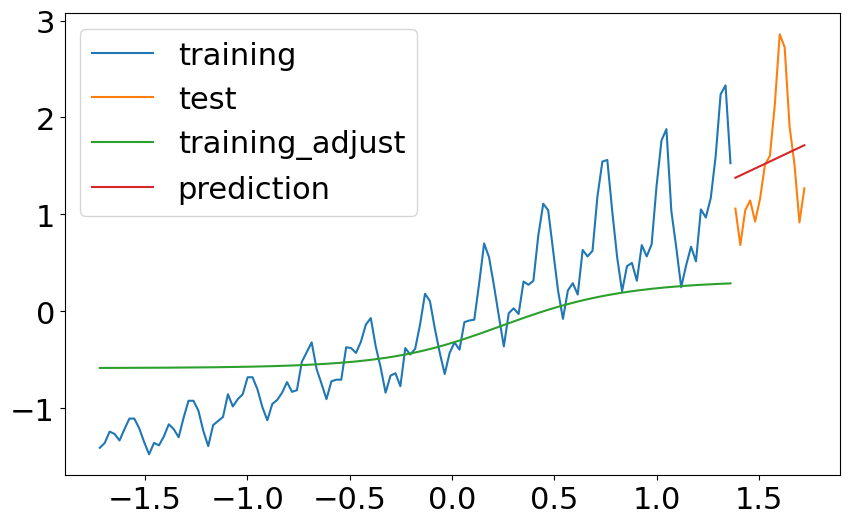

In [32]:
sns.lineplot(x=x_train, y=y_train, label='training')
sns.lineplot(x=x_test, y=y_test, label='test')
sns.lineplot(x=x_train, y=y_predict[:,0], label='training_adjust')
sns.lineplot(x=x_test, y=y_predict_test[:,0], label='prediction')

In [33]:
vector = pd.DataFrame(y_train)[0] #saving y_train data into a dataframe called vector

In [35]:
#function to separate data
def separate_data(vector, n_steps):
    '''Input: vector: number of passengers
        n_steps: number of steps in the regressor
        Output: x_new: array 2D
        y_new: array 1D - Our Target'''
    x_new, y_new = [], []

    for i in range(n_steps, vector.shape[0]):
        x_new.append(list(vector.loc[i-n_steps:i-1]))
        y_new.append(vector.loc[i])
    x_new, y_new = np.array(x_new), np.array(y_new)
    return x_new, y_new

In [36]:
x_train_new, y_train_new = separate_data(vector, 1)

In [37]:
x_train_new[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [38]:
y_train_new[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [39]:
vector2 = pd.DataFrame(y_test)[0]

In [40]:
x_test_new, y_test_new = separate_data(vector2, 1)

In [41]:
regressor3 = Sequential()
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [42]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')
regressor3.fit(x_train_new, y_train_new, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7815
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7516
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7278
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7083
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6894
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6663
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6426
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6160
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5895
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5580
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5274
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4925
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [43]:
y_predict_new = regressor3.predict(x_train_new)

4/4 [==============================] - 0s 2ms/step


<Axes: xlabel='time', ylabel='0'>

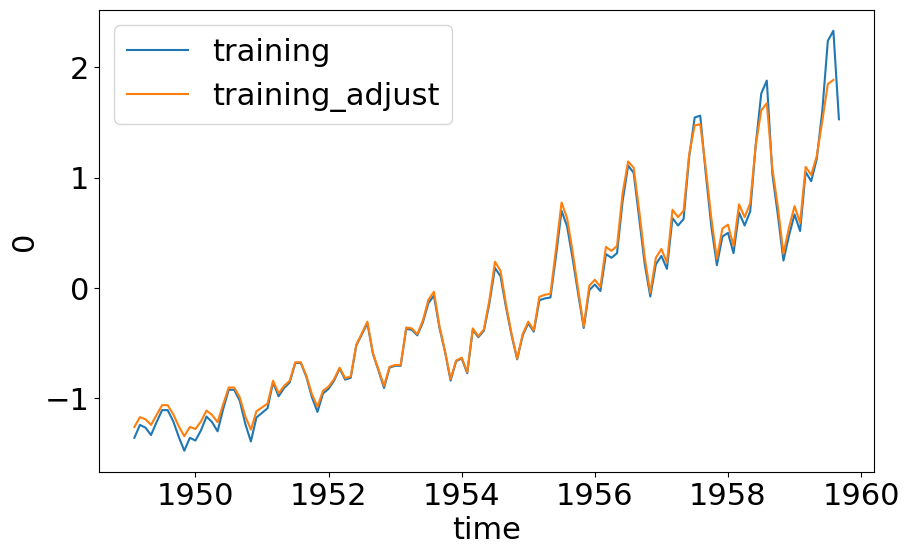

In [44]:
sns.lineplot(x='time', y=y_train_new, data=passengers[1:129], label='training')
sns.lineplot(x='time', y=pd.DataFrame(y_predict_new)[0], data=passengers[1:129], label='training_adjust')

In [45]:
y_predict_new_test = regressor3.predict(x_test_new)

1/1 [==============================] - 0s 48ms/step


In [46]:
result = pd.DataFrame(y_predict_new_test)[0]

<Axes: xlabel='time', ylabel='0'>

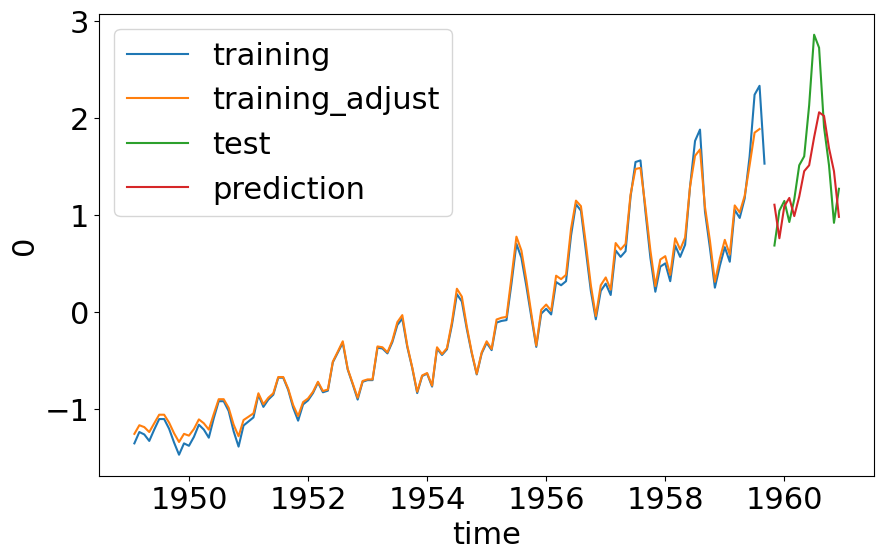

In [47]:
sns.lineplot(x='time', y=y_train_new, data=passengers[1:129], label='training')
sns.lineplot(x='time', y=pd.DataFrame(y_predict_new)[0], data=passengers[1:129], label='training_adjust')
sns.lineplot(x='time', y=y_test_new, data=passengers[130:144], label='test')
sns.lineplot(x='time', y=result.values, data=passengers[130:144], label='prediction')

In [48]:
x_train_new, y_train_new = separate_data(vector, 4) #n_steps = number of columns

In [50]:
x_train_new[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [51]:
y_train_new[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [54]:
x_test_new, y_test_new = separate_data(vector2, 4)

In [55]:
regressor4 = Sequential()
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False)) #4 input values per line (input_dim)
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [56]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')
regressor4.fit(x_train_new, y_train_new, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7502
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6753
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6072
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5393
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4782
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4120
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3509
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2908
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2465
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2078
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1812
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1579
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

In [57]:
y_predict_new = regressor4.predict(x_train_new)

4/4 [==============================] - 0s 1ms/step


In [65]:
y_predict_new_test = regressor4.predict(x_test_new)

1/1 [==============================] - 0s 31ms/step


In [66]:
training_result = pd.DataFrame(y_predict_new)[0]
result = pd.DataFrame(y_predict_new_test)[0]

<Axes: xlabel='time'>

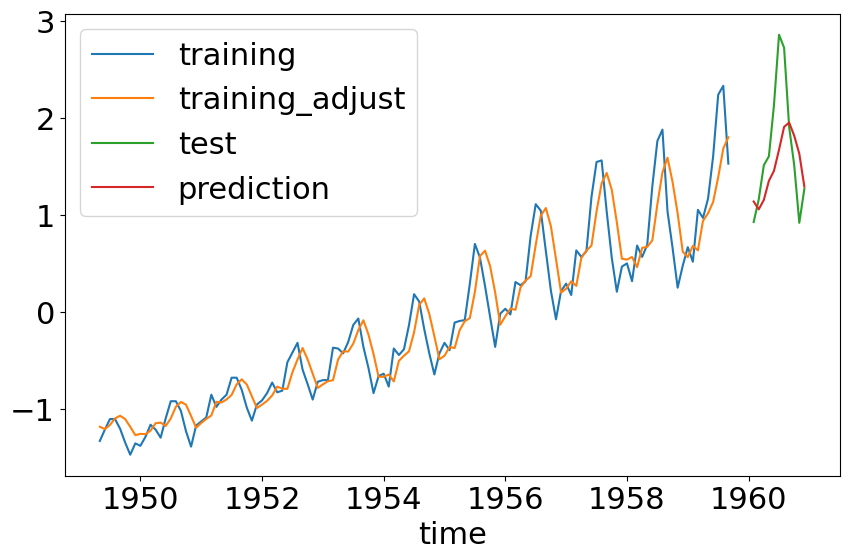

In [68]:
sns.lineplot(x='time', y=y_train_new, data=passengers[4:129], label='training')
sns.lineplot(x='time', y=training_result.values, data=passengers[4:129], label='training_adjust')
sns.lineplot(x='time', y=y_test_new, data=passengers[133:144], label='test')
sns.lineplot(x='time', y=result.values, data=passengers[133:144], label='prediction')